In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount("/content/gdrive")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#Reading in Resolution data that has already been labeled by GPT
df = pd.read_csv("/content/gdrive/MyDrive/UNGA/full_text_data2.csv")

<ipython-input-18-8028321557e1>:2: DtypeWarning: Columns (48,302,304,305,306,307) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/gdrive/MyDrive/UNGA/full_text_data2.csv")


In [ ]:
#Fixing up the country column so that spaces don't distinguish between variables and that missing is now None
df['country'] = df['country'].fillna('None')
df['Country Concerned'] = df['Country Concerned'].fillna('None')

#Getting rid of extraneous spaces before and after name
df['country'] = df['country'].str.strip()
df['Country Concerned'] = df['Country Concerned'].str.strip()


# Drop rows where 'Country' contains "Understood"
df = df[~df['country'].str.contains("Understood", case=False, na=False)]


In [ ]:
#Now fixing values of GPT and UN Watch so that they use the same country names.

df['country'] = df['country'].replace("Russian Federation", "Russia")
df['country'] = df['country'].replace("Islamic Republic of Iran", "Iran")
df['country'] = df['country'].replace("Republic of Korea", "South Korea")
df['country'] = df['country'].replace("Democratic People's Republic of Korea", "North Korea")
df['country'] = df['country'].replace("Republic of Moldova", "Moldova")
df['country'] = df['country'].replace("United States of America", "United States")
df['country'] = df['country'].replace("Syrian Arab Republic", "Syria")
df['country'] = df['country'].replace("United Kingdom of Great Britain and Northern Ireland", "United Kingdom")
df['country'] = df['country'].replace("United Kingdom of Great Britain and Northern Ireland, United States of America	", "United Kingdom")


In [ ]:
df_filtered = df[df['year'] >= 2015]

# Calculate F1 score for the filtered subset
f1 = f1_score(df_filtered['Country Concerned'], df_filtered['country'], average='weighted')
precision = precision_score(df_filtered['Country Concerned'], df_filtered['country'], average='weighted')
accuracy = accuracy_score(df_filtered['Country Concerned'], df_filtered['country'])
recall = recall_score(df_filtered['Country Concerned'], df_filtered['country'], average='weighted')
print(f1)
print(precision)
print(accuracy)
print(recall)



0.9427708853559198
0.9732685809156778
0.9172932330827067
0.9172932330827067


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Create a new column with the condition
df_filtered['is_israel_pred'] = (df_filtered['country'] == 'Israel').astype(int)
df_filtered['is_israel_true'] = (df_filtered['Country Concerned'] == 'Israel').astype(int)

# Create the confusion matrix
cm = confusion_matrix(df_filtered['is_israel_true'], df_filtered['is_israel_pred'])
f1 = f1_score(df_filtered['is_israel_true'], df_filtered['is_israel_pred'])



# Print the confusion matrix
print("Confusion Matrix:\n", cm)
print("F1 Score:", f1)


Confusion Matrix:
 [[2756   12]
 [  15  143]]
F1 Score: 0.9137380191693291


<ipython-input-35-e1db7c363d6b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['is_israel_pred'] = (df_filtered['country'] == 'Israel').astype(int)
<ipython-input-35-e1db7c363d6b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['is_israel_true'] = (df_filtered['Country Concerned'] == 'Israel').astype(int)


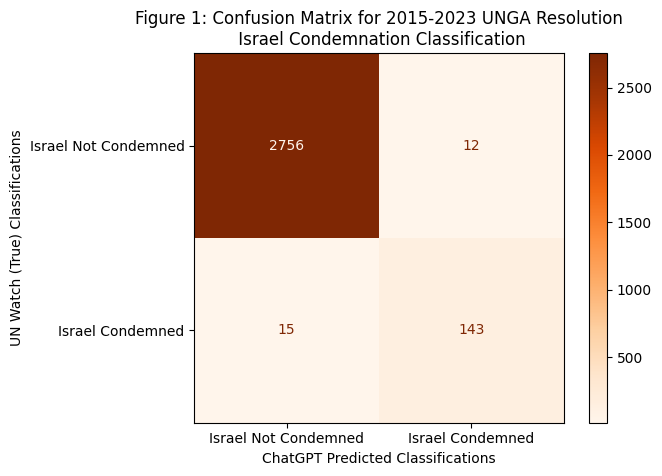

In [ ]:
#Making a confusion matrix for the Israel classification problem
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Israel Not Condemned", "Israel Condemned"])
disp.plot(cmap=plt.cm.Oranges, values_format='d')
plt.title("Figure 1: Confusion Matrix for 2015-2023 UNGA Resolution\n Israel Condemnation Classification")
plt.ylabel("UN Watch (True) Classifications")
plt.xlabel("ChatGPT Predicted Classifications")
plt.show()

In [ ]:
# Assume df_filtered is your DataFrame
import pandas as pd

# Filter rows where 'country_binary' does not equal 'Country Concerned_binary'
unres_values = df_filtered.loc[
    df_filtered['is_israel_true'] != df_filtered['is_israel_pred'],
    ['unres', 'country', 'Country Concerned']
]

unres_values.head(5)

,unres,country,Country Concerned
250,R/ES/10/21,Israel,None
279,R/77/313,Israel,None
571,R/77/23,None,Israel
609,R/76/290,Israel,None
778,R/76/126,None,Israel


#Everything below this line is not used, as it artificially tries to make the problem into a binary classification problem.

In [ ]:
#Creating a confusion matrix of a single variable that is 0 for none and 1 if its a country
df_filtered['country_binary'] = df_filtered['country'].apply(lambda x: 1 if x != 'None' else 0)
df_filtered['Country Concerned_binary'] = df_filtered['Country Concerned'].apply(lambda x: 1 if x != 'None' else 0)

# Create the confusion matrix
cm = confusion_matrix(df_filtered['Country Concerned_binary'], df_filtered['country_binary'])

# Print the confusion matrix
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[2488  203]
 [  25  210]]


<ipython-input-23-03988b48d4bf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['country_binary'] = df_filtered['country'].apply(lambda x: 1 if x != 'None' else 0)
<ipython-input-23-03988b48d4bf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Country Concerned_binary'] = df_filtered['Country Concerned'].apply(lambda x: 1 if x != 'None' else 0)


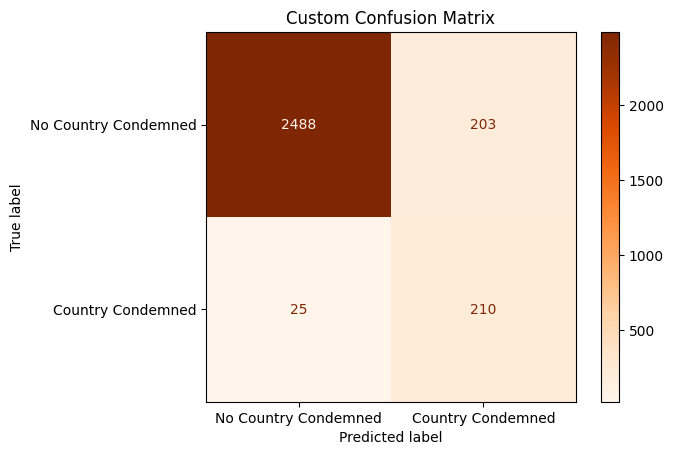

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Country Condemned", "Country Condemned"])
disp.plot(cmap=plt.cm.Oranges, values_format='d')
plt.title("Custom Confusion Matrix")
plt.show()

In [ ]:
# Assume df_filtered is your DataFrame
import pandas as pd

# Filter rows where 'country_binary' does not equal 'Country Concerned_binary'
unres_values = df_filtered.loc[
    df_filtered['country_binary'] != df_filtered['Country Concerned_binary'],
    ['unres', 'country', 'Country Concerned']
]

unres_values.head(5)

,unres,country,Country Concerned
126,R/78/126,Angola,None
156,R/78/86,United States,None
157,R/78/87,United Kingdom,None
158,R/78/88,United Kingdom,None
159,R/78/89,United Kingdom,None


In [ ]:
# Count the total value (sum of all predicted values)
total_value = sum(df_filtered['country_binary'])

print("Total value of y_pred:", total_value)

Total value of y_pred: 413
